In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, make_scorer
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,log_loss

# 1

In [3]:
df_x = pd.read_csv("Downloads/uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header=None)
df_y = pd.read_csv("Downloads/uWaveGestureLibrary_Y_TRAIN", delim_whitespace=True, header=None)
df_z = pd.read_csv("Downloads/uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True, header=None)

In [9]:
con_train = pd.concat([df_x , df_y.iloc[:,1:]] , axis = 1)
con_train = pd.concat([con_train , df_z.iloc[:,1:]] , axis = 1)
classes1 = con_train.iloc[:,0]
con_train = con_train.iloc[:,1:]
con_train

,1,2,3,4,5,6,7,8,9,10,...,306,307,308,309,310,311,312,313,314,315
0,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573
4,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,...,1.867473,1.834319,1.756000,1.638582,1.521164,1.453266,1.515219,1.632637,1.750054,1.867473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.117811,0.117811,0.117811,0.117811,0.117811,0.117811,0.117811,0.117811,0.117811,0.117811,...,-0.212484,-0.137582,-0.066376,-0.010642,0.026809,0.064260,0.101712,0.139163,0.176614,0.214065
892,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,-1.232590,...,0.222775,0.234980,0.247184,0.259389,0.271593,0.283798,0.296003,0.308207,0.320412,0.332617
893,0.282877,0.282877,0.282877,0.282877,0.282877,0.282877,0.282877,0.282877,0.282877,0.282877,...,-0.044573,-0.043387,-0.038164,0.000695,0.027133,0.039175,0.088921,0.158608,0.223306,0.267828
894,1.248704,1.248704,1.248704,1.248704,1.248704,1.248704,1.248704,1.248704,1.248704,1.248704,...,-0.160172,-0.162960,-0.190327,-0.296460,-0.407102,-0.504592,-0.559242,-0.549343,-0.505912,-0.433044


In [10]:
x_test = pd.read_csv("Downloads/uWaveGestureLibrary_X_TEST", delim_whitespace=True, header=None)
y_test = pd.read_csv("Downloads/uWaveGestureLibrary_Y_TEST", delim_whitespace=True, header=None)
z_test = pd.read_csv("Downloads/uWaveGestureLibrary_Z_TEST", delim_whitespace=True, header=None)

In [11]:
con_test = pd.concat([x_test , y_test.iloc[:,1:]] , axis = 1)
con_test = pd.concat([con_test , z_test.iloc[:,1:]] , axis = 1)
classes2 = con_test.iloc[:,0]
con_test = con_test.iloc[:,1:]


## A

In [17]:
scores= []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i,p=1) # p=1 so this is manhattan distance, weight = uniform by default
    score = cross_val_score(knn, con_train, classes1, cv=10)
    scores.append(np.mean(score))
error =np.ones_like(scores)-scores
ideal_k_1 = np.argmin(error) + 1

Minimum error:  0.04126092384519353 at K = 1


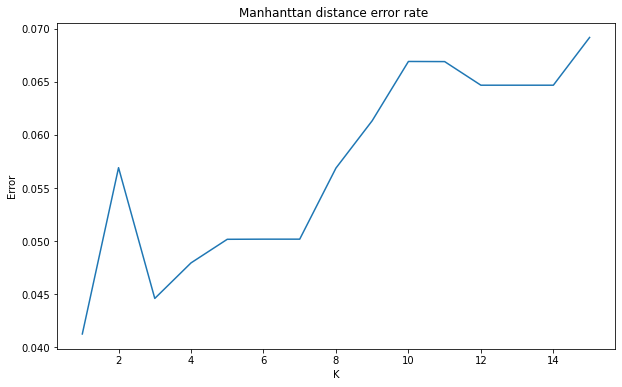

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),error)
plt.title('Manhanttan distance error rate ')
plt.xlabel('K')
plt.ylabel('Error')
print("Minimum error: ",min(error),"at K =", ideal_k_1)

In [20]:
scores2= []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i,p=2) # p=2 so this is euclidian distance
    score = cross_val_score(knn, con_train, classes1, cv=10)
    scores2.append(np.mean(score))
error =np.ones_like(scores)-scores2
ideal_k_2 = np.argmin(error) + 1

Minimum error:  0.05580524344569293 at K = 3


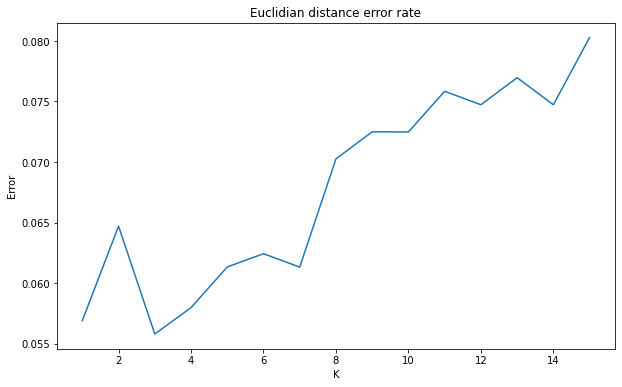

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),error)
plt.title('Euclidian distance error rate')
plt.xlabel('K')
plt.ylabel('Error')
print("Minimum error: ",min(error),"at K =", ideal_k_2)

## B

In [67]:
start = time.time()


knn1 = KNeighborsClassifier(n_neighbors=1 ,p=1) # p=1 so this is manhattan distance

knn1.fit(con_train,classes1)

pred1 = knn1.predict(con_test)

finish = time.time()
print(finish- start)




5.048490285873413


In [68]:
knn_1_acc = accuracy_score(classes2,pred1)
print('accuracy value of manhattan distance is', knn_1_acc)

confusion1 = pd.crosstab(classes2, pred1 , colnames=['predicted'],rownames=['actual'])
confusion1

accuracy value of manhattan distance is 0.954215522054718


predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
actual,,,,,,,,
1.0,430,0,0,2,0,5,0,0
2.0,1,451,0,0,0,0,0,0
3.0,2,0,418,0,16,14,4,0
4.0,3,0,0,392,40,11,0,4
5.0,3,0,9,5,415,1,0,0
6.0,3,0,5,13,16,411,0,1
7.0,0,0,2,0,0,0,445,0
8.0,0,0,0,3,1,0,0,456


In [69]:
start = time.time()


knn2 = KNeighborsClassifier(n_neighbors=ideal_k_2 ,p=2) # p=2 so this is euclidian distance

knn2.fit(con_train,classes1)

pred2 = knn2.predict(con_test)

finish = time.time()
print(finish- start)


0.3570404052734375


In [70]:
knn_2_acc = accuracy_score(classes2,pred2)
print('accuracy value of euclidian distance is', knn_2_acc)

confusion2 = pd.crosstab(classes2, pred2 , colnames=['predicted'],rownames=['actual'])
confusion2

accuracy value of euclidian distance is 0.9438860971524288


predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
actual,,,,,,,,
1.0,431,0,0,2,0,4,0,0
2.0,1,449,0,0,0,0,2,0
3.0,2,0,413,0,15,20,4,0
4.0,7,0,0,370,60,6,0,7
5.0,3,0,6,1,422,1,0,0
6.0,6,0,7,15,28,392,1,0
7.0,0,0,1,0,0,0,446,0
8.0,0,0,0,1,1,0,0,458


##### somehow time spent on manhattan distance is longer than euclidian distance in my model. However, manhanttan distance model has higher accuracy than euclidian model. The reason for this result is may be curse of dimensinality. From confusion matrices, class 6 is tend to mispredicted as class 5 and 4; and the model tend to predict as class 5. The reasons for these cases may be the number examples for the classes.

## C

###### Yes, it does make sense because while concataneting axes we reduced the into 2-d; however, our actual data is 3-d, so the weight of some dimension may be obscure with current model.

# 2

## A

In [79]:
ratio = classes1[classes1 == 3].size / classes1.size
print(ratio)

0.11830357142857142


In [87]:
from sklearn.linear_model import LogisticRegression
classes1_ = np.where(classes1==3, 1, 0)
print(classes1_[:20])

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [99]:
logistic= LogisticRegression(class_weight = {1: ratio, 0: 1-ratio}) # instead of interpreting probabilities I am passing class_weights to the predictor 
logistic.fit(con_train,classes1_)

C:\Users\T460s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.8816964285714286, 1: 0.11830357142857142})

In [98]:
classes2_ = np.where(classes2==3, 1, 0)
pred_ = logistic.predict(con_test)
print("Accuracy : ", accuracy_score(classes2_,pred_))

confusion2 = pd.crosstab(classes2_, pred_ , colnames=['predicted'],rownames=['actual'])
confusion2

Accuracy :  0.9438860971524288


predicted,0,1
actual,,
0,3096,32
1,169,285


## B

In [100]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

scores = []
lamb = np.arange(1,15,0.4)

log_cv = LogisticRegressionCV(Cs = lamb, cv = 10 ,class_weight = {1: ratio, 0: 1-ratio}, penalty='l1',solver='liblinear', 
                                 scoring = 'neg_log_loss',random_state = 42)

In [101]:
log_cv.fit(con_train,classes1_)

-0.10352229345452732

In [107]:
print('best regulization parameter is ', log_cv.C_)

best regulization parameter is  [2.6]


In [109]:
pred_lg = log_cv.predict(con_test)
print("Accuracy : ", accuracy_score(classes2_,pred_lg))

Accuracy :  0.9422110552763819


In [140]:
print(len(log_cv.coef_[log_cv.coef_== 0]), "feature weight reduced to zero with the lambda value of ", log_cv.C_, "with the total number of feature of",
      len(log_cv.coef_[0]), ". The ratio is ",round(len(log_cv.coef_[log_cv.coef_== 0])/len(log_cv.coef_[0])*100,2), "%")

877 feature weight reduced to zero with the lambda value of  [2.6] with the total number of feature of 945 . The ratio is  92.8 %


In [135]:
print("first 5 number of features with the highest weight",np.argsort(log_cv.coef_.flatten())[:5])
print("first 5 number of features with the lowest weight",np.argsort(log_cv.coef_.flatten())[-5:])

first 5 number of features with the highest weight [ 42 812 144 885 803]
first 5 number of features with the lowest weight [237 258 506 280 480]


##### In case where we have larger number of features than the number of data points, regulalation methods are useful. In our data, we have so much unimportant so using Lasso penalties so we reduce the weight of unimportant features to 0 more helpful rather than using Ridge penalty, where the weights converge to zero but never reaches. In our data, 92% of feature's weighr reduced to zero, which makes sense.

## C

In [ ]:
??